<a href="https://colab.research.google.com/github/MK316/Fall2022/blob/main/session05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Session 5: Basic statistics

* dataframe handling
* descriptive statics
* basic plots

## [1] Dataframe: columns and rows

In [1]:
import pandas as pd

Creating a dataframe #1: using lists

In [2]:
name = ['Mary','Tom','John']
grade1 = [89, 70, 65]
grade2 = [90, 60, 90]

In [14]:
df1 = pd.DataFrame()
df1['Name'] = name
df1['English'] = grade1
df1['Math'] = grade2

df1

,Name,English,Math
0,Mary,89,90
1,Tom,70,60
2,John,65,90


Creating a dataframe #2: using a dictionary data

In [15]:
d = {'Name': ['Jane','Lori','Ben'], 'English': [40, 60, 70], 'Korean': [90, 80, 89]}
df2 = pd.DataFrame(data=d)
df2

,Name,English,Korean
0,Jane,40,90
1,Lori,60,80
2,Ben,70,89


## CSV file to read

[dataset](https://raw.githubusercontent.com/MK316/F2022/main/22_grades.csv)

In [16]:
data = pd.read_csv("22_grades.csv")

In [17]:
data.head()

,Group,Rid,Midterm,Final
0,G7,1,55.8,67.0
1,G7,2,52.2,70.0
2,G7,3,52.7,66.8
3,G7,4,60.2,80.2
4,G6,5,50.7,58.0


In [18]:
data.tail()

,Group,Rid,Midterm,Final
25,G1,26,57.9,72.0
26,G1,27,46.4,63.0
27,G1,28,57.6,64.0
28,G1,29,20.1,55.0
29,A,30,77.6,67.0


Selecting subdata (column selecting)

In [19]:
df3 = data[["Group","Midterm","Final"]]
df3.head()

,Group,Midterm,Final
0,G7,55.8,67.0
1,G7,52.2,70.0
2,G7,52.7,66.8
3,G7,60.2,80.2
4,G6,50.7,58.0


## Practice with dataframe

In [20]:
# Creating the dataframe 
df = pd.DataFrame({"A":[12, 4, 5, None, 1],
                   "B":[7, 2, 54, 3, None],
                   "C":[20, 16, 11, 3, 8],
                   "D":[14, 3, None, 2, 6]})
df

,A,B,C,D
0,12.0,7.0,20,14.0
1,4.0,2.0,16,3.0
2,5.0,54.0,11,NaN
3,NaN,3.0,3,2.0
4,1.0,NaN,8,6.0


In [21]:
df.mean()

A     5.50
B    16.50
C    11.60
D     6.25
dtype: float64

In [22]:
df.describe()

,A,B,C,D
count,4.000000,4.00000,5.000000,4.000000
mean,5.500000,16.50000,11.600000,6.250000
std,4.654747,25.09316,6.655825,5.439056
min,1.000000,2.00000,3.000000,2.000000
25%,3.250000,2.75000,8.000000,2.750000
50%,4.500000,5.00000,11.000000,4.500000
75%,6.750000,18.75000,16.000000,8.000000
max,12.000000,54.00000,20.000000,14.000000


In [23]:
data.mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  """Entry point for launching an IPython kernel.


Rid        15.500000
Midterm    57.930000
Final      73.333333
dtype: float64

In [24]:
data.describe()

,Rid,Midterm,Final
count,30.000000,30.000000,30.000000
mean,15.500000,57.930000,73.333333
std,8.803408,14.984685,11.027375
min,1.000000,18.300000,55.000000
25%,8.250000,51.675000,66.725000
50%,15.500000,57.750000,70.000000
75%,22.750000,67.375000,79.725000
max,30.000000,81.900000,95.400000


# t.test

Independent two sample t-test

In [27]:
from scipy import stats
import numpy as np

In [25]:
d1 = data['Midterm']
d2 = data['Final']

In [28]:
stats.ttest_ind(d1,d2)

Ttest_indResult(statistic=-4.53468447572897, pvalue=2.944087460429472e-05)

For simpler result display:  
t, p = stats.ttest_ind(a, b)

print("t = " + str(t))  
print("p = " + str(p))

In [29]:
t, p = stats.ttest_ind(d1,d2)
print("t= " + str(t))
print("p= " + str(p))

t= -4.53468447572897
p= 2.944087460429472e-05


In [34]:
print(float(str(p)))

2.944087460429472e-05


Scientific notation:

Exponential e  
float()

In [47]:
# With 'rounding'
"{:.6f}".format(float(str(p)))

'0.000029'

## Application to our data (=df3)

In [59]:
group1 = df3['Midterm']
group2 = df3['Final']

#perform independent two sample t-test
# stats.ttest_ind(group1, group2)

t, p = stats.ttest_ind(group1,group2)
print("t = " + str(t))
print("p = " + str(p))

t = -4.53468447572897
p = 2.944087460429472e-05


In [55]:
"{:.6f}".format(float(str(p)))

'0.000029'

In [61]:
#define samples: G1 vs G2
group1 = df3[df3['Group']=='G1']
group2 = df3[df3['Group']=='G2']

#perform independent two sample t-test
stats.ttest_ind(group1['Midterm'], group2['Midterm'])

Ttest_indResult(statistic=-0.6031165958312262, pvalue=0.568512755072503)

## Boxplot

In [ ]:
import scipy.stats as stats
## Creating sample dataset
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

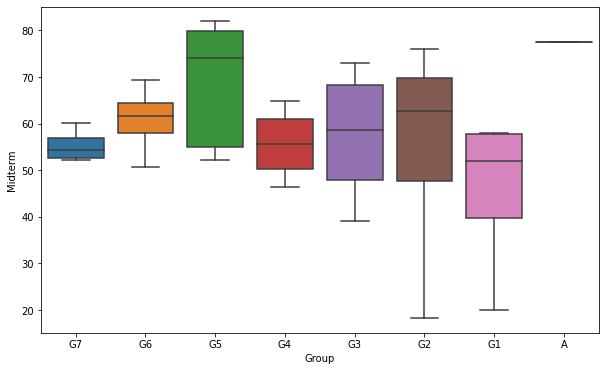

In [ ]:
## Boxplot for 'Midterm' by 'Group'
# plt.rcParams['figure.figsize'] = [10, 6]
sns.boxplot(x='Group', y='Midterm', data=df1)
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [ ]:
model = ols('Midterm ~ Group', data=df1).fit()
sm.stats.anova_lm(model, typ=1)

,df,sum_sq,mean_sq,F,PR(>F)
Group,7.0,1693.965,241.995000,1.105065,0.39438
Residual,22.0,4817.718,218.987182,NaN,NaN


[Online reference](https://rfriend.tistory.com/639) ANOVA

English grades of 3 classes

[dataset](https://raw.githubusercontent.com/MK316/F2022/main/grade3.csv)

In [68]:
data1 = pd.read_csv("grade3.csv")
data1.tail()

,ClassA,ClassB,ClassC
25,79,54,80
26,65,57,56
27,64,65,77
28,70,100,80
29,80,78,90


In [69]:
data1.mean()

ClassA    73.2
ClassB    66.9
ClassC    65.3
dtype: float64

In [71]:
ClassA = data1['ClassA']
ClassB = data1['ClassB']
ClassC = data1['ClassC']

In [72]:
# Kernel Density Estimate Plot
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = [10, 6]

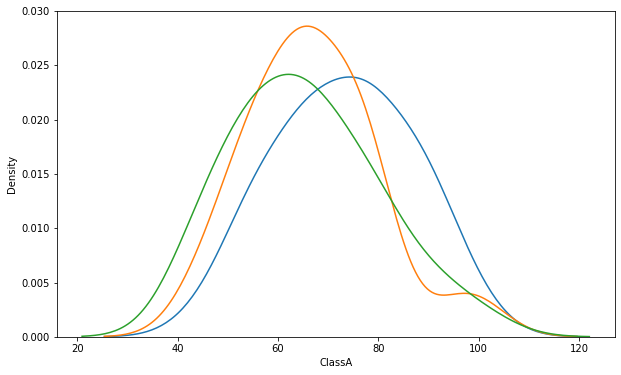

In [74]:
sns.kdeplot(ClassA)
sns.kdeplot(ClassB)
sns.kdeplot(ClassC)
plt.show()

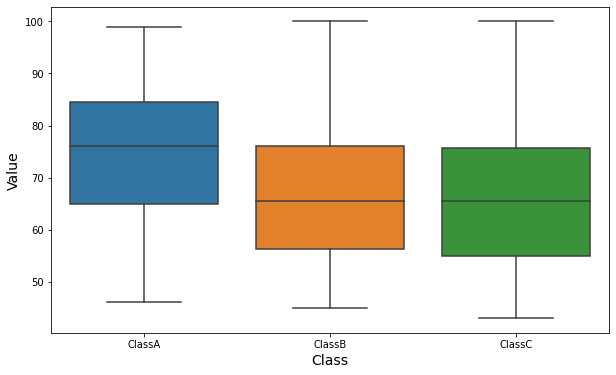

In [75]:
# Boxplot
sns.boxplot(data=data1)
plt.xlabel("Class", fontsize=14)
plt.ylabel("Value", fontsize=14)
plt.show()

* H0 = Means of three groups are the same. (m1=m2=m3)  
* H1 = There is at least one group whose mean is different from the other(s). 

In [76]:
stats.f_oneway(ClassA, ClassB, ClassC)

F_onewayResult(statistic=2.793450649780952, pvalue=0.06670864075202226)

* Different data set

In [ ]:
import numpy as np

In [111]:
d1 = np.random.normal(75, 15, 30)
d2 = np.random.normal(60, 20, 30)
d3 = np.random.normal(55, 25, 30) # different mean

In [112]:
d2 = {'English': d1, 'Korean': d2, 'Math': d3}
data2 = pd.DataFrame(data=d2)
data2.tail()

,English,Korean,Math
25,65.450049,71.380878,59.414333
26,31.805321,61.829848,44.259712
27,43.613132,88.922541,80.449392
28,64.911819,78.465110,57.417340
29,100.960054,48.721881,65.821929


In [113]:
data3 = data2[['English','Korean','Math']].round(decimals = 1)
data3.tail()

,English,Korean,Math
25,65.5,71.4,59.4
26,31.8,61.8,44.3
27,43.6,88.9,80.4
28,64.9,78.5,57.4
29,101.0,48.7,65.8


Narrow dataframe: Subject, Score

[dataset 5](https://raw.githubusercontent.com/MK316/F2022/main/grade5.csv)

In [133]:
data5 = pd.read_csv("grade5.csv")
data5.head()

,Subject,Grade
0,English,75.8
1,English,50.1
2,English,84.7
3,English,55.8
4,English,65.1


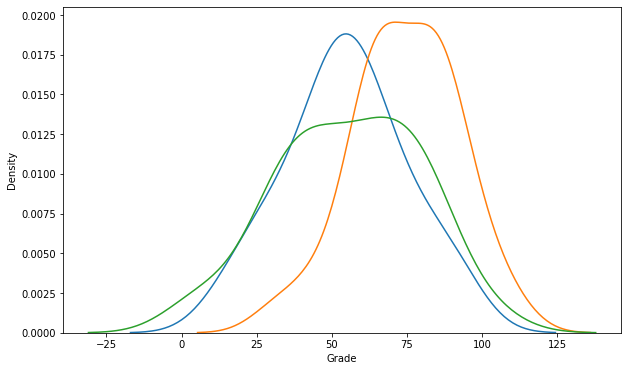

In [145]:
kor = data5['Grade'][data5['Subject']=="Korean"]
eng = data5['Grade'][data5['Subject']=="English"]
math = data5['Grade'][data5['Subject']=="Math"]

sns.kdeplot(kor)
sns.kdeplot(eng)
sns.kdeplot(math)
plt.show()

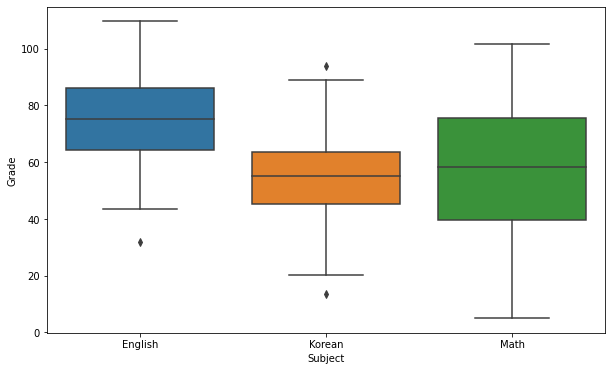

In [147]:
# Boxplot
sns.boxplot(x='Subject', y='Grade', data=data5)

In [148]:
stats.f_oneway(kor, eng, math)

F_onewayResult(statistic=9.004503630119457, pvalue=0.00027908239711722034)

## Post-hoc test

Tukey's HSD(honestly significant difference) test

In [117]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

In [153]:
# perform Tukey's test
tukey = pairwise_tukeyhsd(endog=data5['Grade'],
                          groups=data5['Subject'],
                          alpha=0.05)
print(tukey)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1 group2 meandiff p-adj   lower    upper  reject
------------------------------------------------------
English Korean   -19.94  0.001 -32.6059 -7.2741   True
English   Math -19.0733 0.0016 -31.7393 -6.4074   True
 Korean   Math   0.8667    0.9 -11.7993 13.5326  False
------------------------------------------------------
